<a href="https://colab.research.google.com/github/ThuanPhat2709/BT-AI/blob/main/VietNamese_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VietNamese Food

## Import Library

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input,MaxPooling2D,Conv2D
from keras.backend import conv2d
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import cv2
import os
import tensorflow as  tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

## Data Processing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
valid = ImageDataGenerator(rescale = 1./255)

In [5]:
train_set=train.flow_from_directory('/content/drive/MyDrive/Food/Train',
                                     target_size=(150,150),
                                     batch_size=12,
                                     class_mode='categorical')
valid_set=valid.flow_from_directory('/content/drive/MyDrive/Food/Validation',
                                              target_size=(150,150),
                                              batch_size=12,
                                              class_mode='categorical')

Found 601 images belonging to 10 classes.
Found 243 images belonging to 10 classes.


## Create Model

In [6]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same",input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [7]:
opt=SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
history=model.fit(train_set,epochs=40, batch_size=32,validation_data=(valid_set),verbose=1)

Epoch 1/40
51/51 [==============================] - 239s 4s/step - loss: 2.2106 - accuracy: 0.1498 - val_loss: 1.8862 - val_accuracy: 0.2263
Epoch 2/40
51/51 [==============================] - 7s 133ms/step - loss: 1.8329 - accuracy: 0.3062 - val_loss: 1.5844 - val_accuracy: 0.3909
Epoch 3/40
51/51 [==============================] - 7s 137ms/step - loss: 1.6500 - accuracy: 0.3527 - val_loss: 1.3933 - val_accuracy: 0.3827
Epoch 4/40
51/51 [==============================] - 7s 130ms/step - loss: 1.5731 - accuracy: 0.3993 - val_loss: 1.3580 - val_accuracy: 0.4198
Epoch 5/40
51/51 [==============================] - 7s 130ms/step - loss: 1.4776 - accuracy: 0.4176 - val_loss: 1.9726 - val_accuracy: 0.2469
Epoch 6/40
51/51 [==============================] - 7s 130ms/step - loss: 1.5161 - accuracy: 0.4260 - val_loss: 1.3174 - val_accuracy: 0.4568
Epoch 7/40
51/51 [==============================] - 7s 130ms/step - loss: 1.4314 - accuracy: 0.4875 - val_loss: 1.1801 - val_accuracy: 0.6049
Epoch 8

## Create Label

In [9]:
train_set.class_indices

{'BanhHoi': 0,
 'BanhUot': 1,
 'bánh khọt': 2,
 'bánh mỳ': 3,
 'bánh xèo': 4,
 'bún riêu cua': 5,
 'cơm': 6,
 'gỏi cuốn': 7,
 'nem rán': 8,
 'phở': 9}

In [10]:
Names={0: 'Bánh Hỏi',
 1: 'Bánh Uớt',
 2: 'Bánh Khọt',
 3: 'Bánh mỳ',
 4: 'Bánh Xèo',
 5: 'Bún Riêu Cua',
 6: 'Cơm',
 7: 'Gỏi Cuốn',
 8: 'Nem Rán',
 9: 'Phở'}

## Test Model

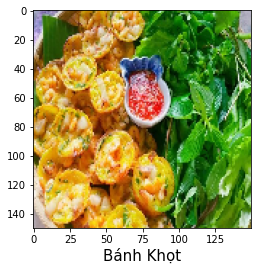

In [15]:
img=load_img('aa.png',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

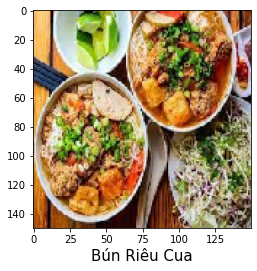

In [14]:
img=load_img('2.png',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

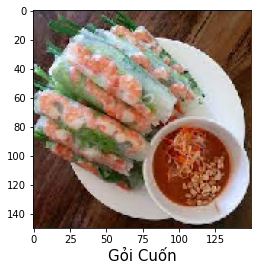

In [18]:
img=load_img('3.png',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

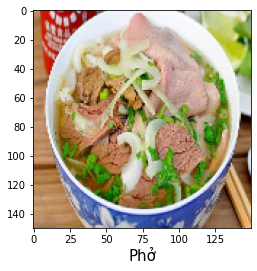

In [19]:
img=load_img('4.png',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

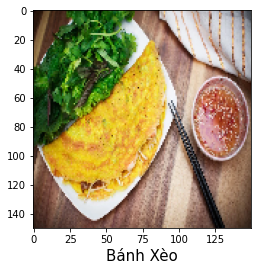

In [20]:
img=load_img('ee.png',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,150,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

## Accuracy

In [21]:
score=model.evaluate(valid_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

21/21 [==============================] - 1s 52ms/step - loss: 0.8504 - accuracy: 0.7737
Sai số:  0.8503895998001099
Độ chính xác:  0.7736625671386719


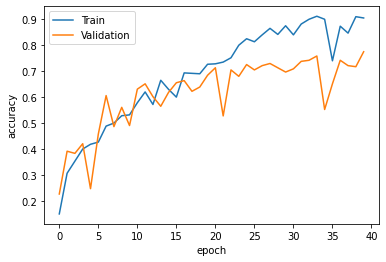

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

## Save Model

In [23]:
model.save('food.h5')#lưu mô hình
from tensorflow.keras.models import load_model
model5=load_model('food.h5')